<H3>Import libraries</H3>

In [1]:
import numpy as np
import os
from scipy.misc import imread, imsave, imresize, imshow
import random
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
import gc
from sklearn.cross_validation import train_test_split

import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

<H3>Read the files containing Phase '1' data</H3>

In [2]:
train = pd.read_csv('train_part\\1\\X_train_1.csv')

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train['FF'].mean()

61.03945032922989

In [4]:
train[train.FF==0].shape

(42195, 226)

In [5]:
train.shape

(52395, 226)

In [6]:
train.drop(train.columns[[0,1,2,6,7]], axis = 1, inplace = True)
train.drop('PH', axis=1, inplace=True)

In [7]:
train['Month1']=np.where(train['Month']==1.0, 1,0)
train['Month2']=np.where(train['Month']==2.0, 1,0)
train['Month3']=np.where(train['Month']==3.0, 1,0)
train['Month4']=np.where(train['Month']==4.0, 1,0)
train['Month5']=np.where(train['Month']==5.0, 1,0)
train['Month6']=np.where(train['Month']==6.0, 1,0)
train['Month7']=np.where(train['Month']==7.0, 1,0)
train['Month8']=np.where(train['Month']==8.0, 1,0)
train['Month9']=np.where(train['Month']==9.0, 1,0)
train['Month10']=np.where(train['Month']==10.0, 1,0)
train['Month11']=np.where(train['Month']==11.0, 1,0)
train['Month12']=np.where(train['Month']==12.0, 1,0)
train['Hour1']=np.where(train['Hour']==1.0, 1,0)
train['Hour2']=np.where(train['Hour']==2.0, 1,0)
train['Hour3']=np.where(train['Hour']==3.0, 1,0)
train['Hour4']=np.where(train['Hour']==4.0, 1,0)
train['Hour5']=np.where(train['Hour']==5.0, 1,0)
train['Hour6']=np.where(train['Hour']==6.0, 1,0)
train['Hour7']=np.where(train['Hour']==7.0, 1,0)
train['Hour8']=np.where(train['Hour']==8.0, 1,0)
train['Hour9']=np.where(train['Hour']==9.0, 1,0)
train['Hour10']=np.where(train['Hour']==10.0, 1,0)
train['Hour11']=np.where(train['Hour']==11.0, 1,0)
train['Hour12']=np.where(train['Hour']==12.0, 1,0)
train['Hour13']=np.where(train['Hour']==13.0, 1,0)
train['Hour14']=np.where(train['Hour']==14.0, 1,0)
train['Hour15']=np.where(train['Hour']==15.0, 1,0)
train['Hour16']=np.where(train['Hour']==16.0, 1,0)
train['Hour17']=np.where(train['Hour']==17.0, 1,0)
train['Hour18']=np.where(train['Hour']==18.0, 1,0)
train['Hour19']=np.where(train['Hour']==19.0, 1,0)
train['Hour20']=np.where(train['Hour']==20.0, 1,0)
train['Hour21']=np.where(train['Hour']==21.0, 1,0)
train['Hour22']=np.where(train['Hour']==22.0, 1,0)
train['Hour23']=np.where(train['Hour']==23.0, 1,0)
train['Hour24']=np.where(train['Hour']==24.0, 1,0)

In [8]:
train.drop('Month', axis = 1, inplace = True)
train.drop('Hour', axis = 1, inplace = True)

In [9]:
y = train.pop('FF')

In [10]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 2016)

In [11]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [12]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

<H3>Train the model</H3>

In [13]:
params = {}
params["objective"] = "reg:linear"
params["booster"] = "gbtree"
params["max_depth"] = 6
params["eval_metric"] = 'rmse'
params["subsample"] = 0.9
params["colsample_bytree"] = 0.9
params["silent"] = 1
params["seed"] = 2016
params["eta"] = 0.1

plst = list(params.items())
num_rounds = 500
early_stopping_rounds = 10

watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]

model_1_1 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:221.388	eval-rmse:218.124
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:201.344	eval-rmse:198.225
[2]	train-rmse:183.376	eval-rmse:180.46
[3]	train-rmse:167.478	eval-rmse:165.009
[4]	train-rmse:153.472	eval-rmse:151.243
[5]	train-rmse:140.848	eval-rmse:138.895
[6]	train-rmse:129.817	eval-rmse:128.102
[7]	train-rmse:120.038	eval-rmse:118.555
[8]	train-rmse:111.521	eval-rmse:110.217
[9]	train-rmse:103.747	eval-rmse:102.744
[10]	train-rmse:97.076	eval-rmse:96.4507
[11]	train-rmse:91.2663	eval-rmse:90.8477
[12]	train-rmse:86.2199	eval-rmse:86.1644
[13]	train-rmse:81.8164	eval-rmse:82.2278
[14]	train-rmse:77.948	eval-rmse:78.5569
[15]	train-rmse:74.741	eval-rmse:75.7988
[16]	train-rmse:71.8354	eval-rmse:73.2711
[17]	train-rmse:69.4339	eval-rmse:71.0746
[18]	train-rmse:67.129	eval-rmse:69.0403
[19]	train-rmse:65.3337	eval-rmse:67.5146
[20]	train-rmse:63.6825	eval-rms

In [14]:
test_pred = model_1_1.predict(xgtrain1)

In [15]:
len(test_pred)

10479

In [17]:
np.mean(test_pred)

60.125568

In [22]:
max(test_pred)

2313.043

In [23]:
xtrain2, xtrain1, y2, y1 = train_test_split(train, y, test_size = 0.2, random_state = 1982)

In [24]:
xgtrain1 = xgb.DMatrix(xtrain1, label = y1)

In [25]:
xgtrain2 = xgb.DMatrix(xtrain2, label = y2)

In [26]:
watchlist = [(xgtrain2,'train'),(xgtrain1, 'eval')]
model_1_2 = xgb.train(plst, xgtrain2, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-rmse:222.191	eval-rmse:214.765
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:202.078	eval-rmse:195.57
[2]	train-rmse:184.044	eval-rmse:178.399
[3]	train-rmse:167.991	eval-rmse:163.063
[4]	train-rmse:153.877	eval-rmse:149.666
[5]	train-rmse:141.129	eval-rmse:137.595
[6]	train-rmse:130.001	eval-rmse:127.026
[7]	train-rmse:120.178	eval-rmse:117.691
[8]	train-rmse:111.561	eval-rmse:109.614
[9]	train-rmse:103.773	eval-rmse:102.368
[10]	train-rmse:97.1	eval-rmse:96.0856
[11]	train-rmse:91.2676	eval-rmse:90.5181
[12]	train-rmse:86.2048	eval-rmse:85.8748
[13]	train-rmse:81.8467	eval-rmse:81.8803
[14]	train-rmse:78.0857	eval-rmse:78.5993
[15]	train-rmse:74.7878	eval-rmse:75.6493
[16]	train-rmse:71.8944	eval-rmse:73.1101
[17]	train-rmse:69.4398	eval-rmse:70.9261
[18]	train-rmse:67.4199	eval-rmse:69.1888
[19]	train-rmse:65.6546	eval-rmse:67.6681
[20]	train-rmse:63.8725	eval-rm

In [27]:
test = pd.read_csv('test\\CAX_Test.csv')

In [28]:
test = test[test.PH==1]

In [29]:
test.shape

(7752, 227)

In [30]:
test.drop(test.columns[[0,1,2,6,7]], axis = 1, inplace = True)

In [31]:
test.drop('PH', axis=1, inplace=True)

In [32]:
test['Month1']=np.where(test['Month']==1.0, 1,0)
test['Month2']=np.where(test['Month']==2.0, 1,0)
test['Month3']=np.where(test['Month']==3.0, 1,0)
test['Month4']=np.where(test['Month']==4.0, 1,0)
test['Month5']=np.where(test['Month']==5.0, 1,0)
test['Month6']=np.where(test['Month']==6.0, 1,0)
test['Month7']=np.where(test['Month']==7.0, 1,0)
test['Month8']=np.where(test['Month']==8.0, 1,0)
test['Month9']=np.where(test['Month']==9.0, 1,0)
test['Month10']=np.where(test['Month']==10.0, 1,0)
test['Month11']=np.where(test['Month']==11.0, 1,0)
test['Month12']=np.where(test['Month']==12.0, 1,0)
test['Hour1']=np.where(test['Hour']==1.0, 1,0)
test['Hour2']=np.where(test['Hour']==2.0, 1,0)
test['Hour3']=np.where(test['Hour']==3.0, 1,0)
test['Hour4']=np.where(test['Hour']==4.0, 1,0)
test['Hour5']=np.where(test['Hour']==5.0, 1,0)
test['Hour6']=np.where(test['Hour']==6.0, 1,0)
test['Hour7']=np.where(test['Hour']==7.0, 1,0)
test['Hour8']=np.where(test['Hour']==8.0, 1,0)
test['Hour9']=np.where(test['Hour']==9.0, 1,0)
test['Hour10']=np.where(test['Hour']==10.0, 1,0)
test['Hour11']=np.where(test['Hour']==11.0, 1,0)
test['Hour12']=np.where(test['Hour']==12.0, 1,0)
test['Hour13']=np.where(test['Hour']==13.0, 1,0)
test['Hour14']=np.where(test['Hour']==14.0, 1,0)
test['Hour15']=np.where(test['Hour']==15.0, 1,0)
test['Hour16']=np.where(test['Hour']==16.0, 1,0)
test['Hour17']=np.where(test['Hour']==17.0, 1,0)
test['Hour18']=np.where(test['Hour']==18.0, 1,0)
test['Hour19']=np.where(test['Hour']==19.0, 1,0)
test['Hour20']=np.where(test['Hour']==20.0, 1,0)
test['Hour21']=np.where(test['Hour']==21.0, 1,0)
test['Hour22']=np.where(test['Hour']==22.0, 1,0)
test['Hour23']=np.where(test['Hour']==23.0, 1,0)
test['Hour24']=np.where(test['Hour']==24.0, 1,0)

In [33]:
test.drop('Month', axis = 1, inplace = True)
test.drop('Hour', axis = 1, inplace = True)
test.drop('FF', axis = 1, inplace = True)
test_id = test.pop('id')

In [34]:
xgtest = xgb.DMatrix(test)

<H3>Predict on test set</H3>

In [35]:
pred1 = model_1_1.predict(xgtest)
pred2 = model_1_2.predict(xgtest)

In [36]:
submission_1 = pd.DataFrame(columns = ['id', 'pred1', 'pred2', 'FF'])

In [37]:
submission_1['id'] = test_id
submission_1['pred1'] = pred1
submission_1['pred2'] = pred2
submission_1['FF'] = (submission_1['pred1']+submission_1['pred2'])/2.0

In [38]:
submission_1.drop('pred1', axis = 1, inplace = True)
submission_1.drop('pred2', axis = 1, inplace = True)

In [39]:
submission_1.to_csv('0819\\submission_1.csv', index = False)

In [40]:
feat_imp_1 = pd.Series(model_1_1.get_fscore()).sort_values(ascending=False)
feat_imp_2 = pd.Series(model_1_2.get_fscore()).sort_values(ascending=False)

In [41]:
%matplotlib inline

In [42]:
feat_imp_1.to_csv('feat_imp_1_1.csv')
feat_imp_2.to_csv('feat_imp_1_2.csv')

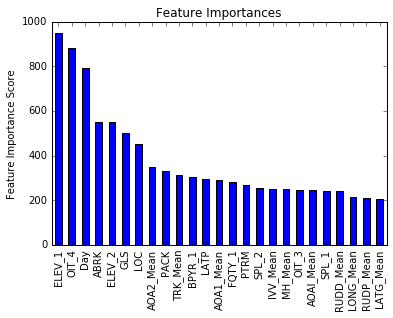

In [43]:
feat_imp_1[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

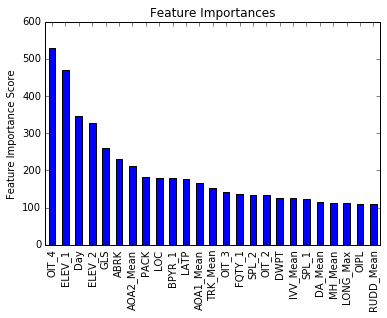

In [44]:
feat_imp_2[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')